In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random 

# Functions

In [3]:
def f_wb(x, w, b) -> float:
    return 1.0 * w * x + b

In [4]:
def J_wb(w, b, data_x, data_y):
    if(len(data_x) != len(data_y)):
        raise RuntimeError("data_x and data_y must be the same length")

    m = len(data_x)

    sum = 0
    for i in range(m):
        sum += pow(f_wb(data_x[i], w, b) - data_y[i], 2)

    return 1.0 / (2.0 * m) * sum


In [5]:
def f_w(x, w):
    return 1.0 * w * x

In [6]:
def J_w(w, data_x, data_y):
    if(len(data_x) != len(data_y)):
        raise RuntimeError("data_x and data_y must be the same length")
    
    m = len(data_x)

    sum = 0
    for i in range(m):
        sum += pow(f_w(data_x[i], w) - data_y[i], 2)

    return (1.0 / (2.0 * m)) * sum

In [7]:
def dJ_w(w, data_x, data_y):
    m = len(data_x)

    sum = 0
    for i in range(m):
        sum += (f_w(data_x[i], w) - data_y[i]) * data_x[i]

    return (1 / (2.0 * m)) * sum


In [8]:
def gradiant_descent(w, a, calibration, data_x, data_y):
    deriv = dJ_w(w, data_x, data_y) 

    steps = 0
    temp_ws = [] 
    while abs(deriv) > calibration:
        deriv = dJ_w(w, data_x, data_y)
        w = w - a * deriv
        steps += 1
        if(steps % 10 == 0):
            temp_ws.append(w)
        
    print("Steps: ", steps)
    print("Steps bw w: ", temp_ws)
    
    return w, np.array(temp_ws)

# Data generation

In [9]:
# Noise
x = np.array([1, 2, 3, 4, 5])
y = np.array([4.5, 7.2, 9.1, 10.8, 13.5])

# W = 5

# x = np.array([1, 2, 3, 4, 5])
# y = x * W 


# Algorithm

In [10]:
w, temp_ws = gradiant_descent(10, 0.01, 0.001, x, y)
y_pred = x * w 

temp_y_preds = np.zeros((len(temp_ws), len(x)))
for i, temp_w in enumerate(temp_ws):
    temp_y_preds[i] = x * temp_w


print("w:", w)

Steps:  189
Temp w:  [np.float64(6.91209541821278), np.float64(5.158287780821993), np.float64(4.162194427707431), np.float64(3.5964528110298155), np.float64(3.275133954880204), np.float64(3.0926375567477526), np.float64(2.9889868226127763), np.float64(2.9301173063008856), np.float64(2.896681750057908), np.float64(2.877691676904351), np.float64(2.8669060666469117), np.float64(2.8607802667258313), np.float64(2.8573010547222975), np.float64(2.8553249999504344), np.float64(2.8542026790175803), np.float64(2.8535652451294835), np.float64(2.8532032078994893), np.float64(2.852997585075931)]
w: 2.852889734864648


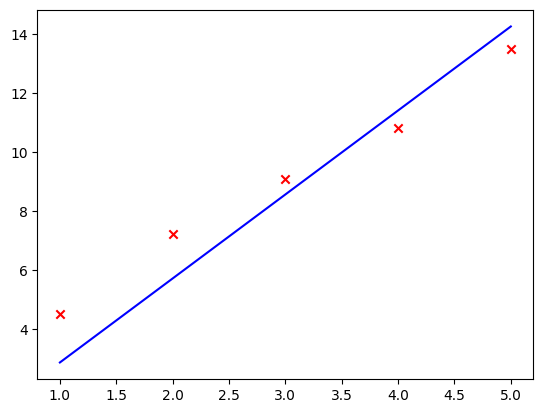

In [11]:
plt.scatter(x, y, marker='x', c="r")
plt.plot(x, y_pred, color="blue")
plt.show()

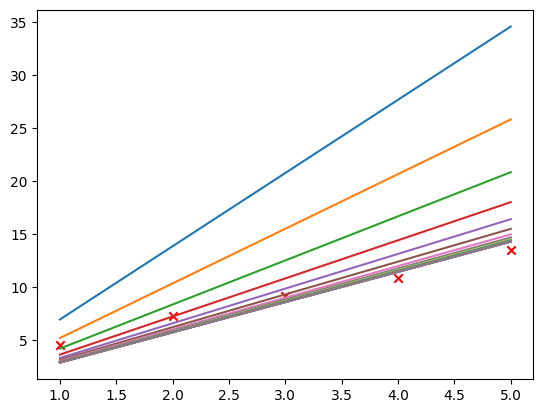

In [12]:
plt.scatter(x, y, marker='x', c="r")
plt.plot(x, y_pred, color="blue")
for temp_y in temp_y_preds:
    plt.plot(x, temp_y)
plt.show()
